In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from numpy.random import default_rng
seed = 1
rng = default_rng(seed)

import os, os.path

from pathlib import Path

import torch
import torch.nn as nn

In [2]:
import importlib.util
spec = importlib.util.spec_from_file_location("module.fcae", str(Path(os.getcwd()).parent.parent) + '/' + "fcae.py")
module_fcae = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module_fcae)

In [3]:
m = 100
phi_arr = rng.random(size=m) * 2*np.pi
n = 16
dx = 2*np.pi / n
x_arr = np.arange(dx/2, 2*np.pi, dx)
X = np.array([np.cos(x_arr + phi) for phi in phi_arr])

In [4]:
# divide into train/test set

m_train = int(0.8 * m)
m_test = m - m_train;

i_train = rng.choice(range(m), size=m_train, replace=False)
i_test = list(set(list(range(m))) - set(i_train))

Xtrainraw = X[i_train]
Xtestraw = X[i_test]

In [5]:
# Normalize appropriatly, i.e., w.r.t to full input matrix X

# not needed for this data set
#meanx = np.mean(Xtrainraw)
#stdx = np.std(Xtrainraw)

#Xtrain = (Xtrainraw - meanx) / stdx
#Xtest = (Xtestraw - meanx) / stdx

Xtrain = Xtrainraw
Xtest = Xtestraw

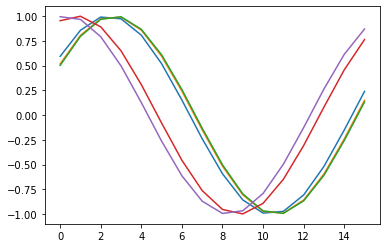

In [6]:
for i in range(5):
    plt.plot(Xtrain[i])
plt.show()

In [7]:
# Create torch.Tensor and torch.utils.data.dataset.TensorDataset for training

tensor_xtrain = torch.Tensor(Xtrain)
tensor_xtest = torch.Tensor(Xtest)

train_dataset = torch.utils.data.TensorDataset(tensor_xtrain, tensor_xtrain)
test_dataset = torch.utils.data.TensorDataset(tensor_xtest, tensor_xtest)

In [8]:
# Network design

layer_widths = [n, 4, 1]
activation_function = nn.Tanh()
loss = nn.MSELoss()

In [9]:
# Training design

# Size for batch gradient descent
batch_size = int(m_train / 2)

# Learning Rate
lr = 1e-3

# Number of learning epochs
num_epochs = 20000

In [18]:
fcae = module_fcae.FullyConnectedAutoencoder(layer_widths, activation_function, seed)

In [11]:
fcae.train_model(loss, lr, batch_size, num_epochs, train_dataset, test_dataset)

Epoch MSELoss(train) MSELoss(test)
0 0.608146 0.628608
100 0.416624 0.443474
200 0.298246 0.344079
300 0.262343 0.318957
400 0.252209 0.314071
500 0.246729 0.309764
600 0.242817 0.302528
700 0.240134 0.293378
800 0.238479 0.284197
900 0.237555 0.276210
1000 0.237054 0.269766
1100 0.236766 0.264646
1200 0.236552 0.260549
1300 0.236371 0.257206
1400 0.236182 0.254338
1500 0.235987 0.251953
1600 0.235761 0.249845
1700 0.235540 0.248116
1800 0.235348 0.246694
1900 0.235147 0.245556
2000 0.235022 0.244710
2100 0.234875 0.244037
2200 0.234757 0.243644
2300 0.234673 0.243328
2400 0.234471 0.243308
2500 0.234226 0.243511
2600 0.233443 0.243995
2700 0.230915 0.245026
2800 0.214184 0.246512
2900 0.138415 0.204577
3000 0.096866 0.158617
3100 0.078934 0.132898
3200 0.070118 0.120239
3300 0.065484 0.112271
3400 0.062808 0.107331
3500 0.060835 0.103682
3600 0.059153 0.100695
3700 0.057391 0.097703
3800 0.055401 0.094521
3900 0.053011 0.090798
4000 0.050006 0.086193
4100 0.046423 0.080640
4200 0.0424

In [12]:
tensor_xptrain = fcae.forward(tensor_xtrain)
tensor_xptest = fcae.forward(tensor_xtest)

In [13]:
Xptrain = tensor_xptrain.detach().numpy()
Xptest = tensor_xptest.detach().numpy()

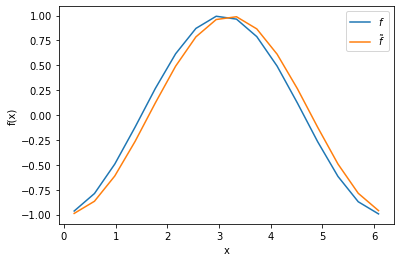

In [14]:
plt.plot(x_arr, Xtest[0], label="$f$")
plt.plot(x_arr, Xptest[0], label="$\\tilde{f}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [15]:
tensor_ctrain = fcae.encode(tensor_xtrain)
tensor_ctest = fcae.encode(tensor_xtest)

In [16]:
Ctrain = tensor_ctrain.detach().numpy()
Ctest = tensor_ctest.detach().numpy()

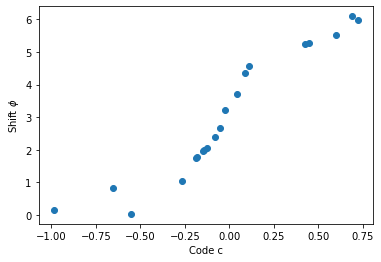

In [17]:
plt.plot(Ctest[:], phi_arr[i_test], "o")
plt.xlabel("Code c")
plt.ylabel("Shift " + "$\phi$")
plt.show()